In [1]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup

In [2]:
url =  "http://bldb.eu/S-BLDB.php"
response = requests.get(url)


In [3]:
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find_all('table')  # Replace 'table' with the appropriate HTML element or attributes


In [4]:
df = pd.read_html(str(table))[1]

In [5]:
# drop the first row
df.drop(df.index[0], inplace=True)
df.head()


,Ambler class,Protein name,PDB code,Resolution (Å),Release date,UniProt code,PubMed ID,DOI,PDB,Mutations,Ligands,Space group,Unit cell parameters,Z value
1,A,BAA-33,6NI1,1.90,2019-01-30,A0A1Y0WMN3,NaN,NaN,pdb,NaN,EDO FMT,P 65,87.849 87.849 149.853 ♦ 90.00 90.00 120.00,12.0
2,A,BAA-83,6W2Z,1.50,2020-03-25,P39824,NaN,NaN,pdb,NaN,*NXL EDO FMT,P 1 21 1,39.681 85.456 70.360 ♦ 90.00 94.97 90.00,4.0
3,A,BEL-1,4MX4,1.60,2014-10-01,Q3SAW3,NaN,NaN,pdb,NaN,CL EDO FLC IPA PGE,P 21 21 2,100.270 120.920 53.410 ♦ 90.00 90.00 90.00,8.0
4,A,BEL-1,4MXB,1.79,2014-10-01,Q3SAW3,NaN,NaN,pdb,NaN,*IM2 CL,P 1 21 1,53.980 95.860 103.420 ♦ 90.00 91.97 90.00,8.0
5,A,BEL-1,4MXG,1.48,2014-10-01,Q3SAW3,NaN,NaN,pdb,NaN,CL FLC MPD,P 1 21 1,54.840 94.690 103.680 ♦ 90.00 92.64 90.00,8.0


In [6]:
# fill empty cells in Ligands with APO
df['Ligands'] = df['Ligands'].fillna('APO')
df.Ligands = df.Ligands.apply(lambda x: x.split(" "))

# drop Ambler class B-3
df = df[df['Ambler class'] != 'B1']
df = df[df['Ambler class'] != 'B2']
df = df[df['Ambler class'] != 'B3']

In [7]:
for CLASS in df['Ambler class'].unique():
    print(CLASS)

A
C
D


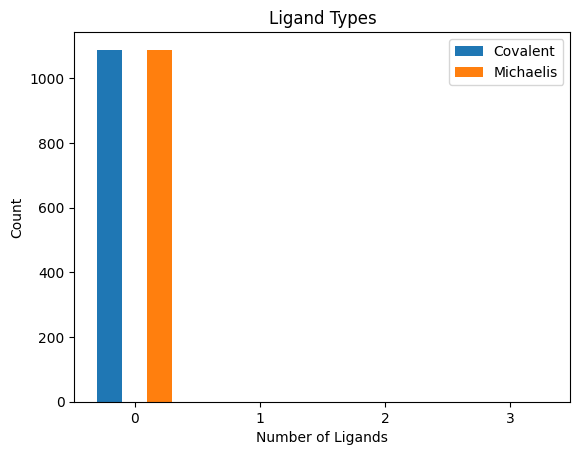

In [8]:
import matplotlib.pyplot as plt

stars = {
    0: 0,
    1: 0,
    2: 0,
    3: 0
}
hashes = {
    0: 0,
    1: 0,
    2: 0,
    3: 0
}
dollars = {
    0: 0,
    1: 0,
    2: 0,
    3: 0
}

for ligand in df.Ligands:
    if ligand == 'APO':
        continue
    else:
        stars[ligand.count('*')] += 1
        hashes[ligand.count('#')] += 1
        dollars[ligand.count('$')] += 1

# Prepare data for plotting
labels = ['0', '1', '2', '3']
star_counts = [stars[i] for i in range(4)]
hash_counts = [hashes[i] for i in range(4)]
dollar_counts = [dollars[i] for i in range(4)]

# Plotting
x = range(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x, star_counts, width, label='Covalent')
# rects2 = ax.bar([i + width for i in x], hash_counts, width, label='Metals')
rects3 = ax.bar([i + width*2 for i in x], dollar_counts, width, label='Michaelis')

# Add some text for labels, title, and axes ticks
ax.set_ylabel('Count')
ax.set_xlabel('Number of Ligands')
ax.set_title('Ligand Types')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [158]:
df["Covalent"] = df.Ligands.apply(lambda x: [y for y in x if "*" in y])
df["Covalent"] = df.Covalent.apply(lambda x: x[0] if len(x) > 0 else None)
df["Covalent"] = df.Covalent.apply(lambda x: x.strip("*") if x is not None else None)

df["Michaelis"] = df.Ligands.apply(lambda x: [y for y in x if "$" in y])
df["Michaelis"] = df.Michaelis.apply(lambda x: x[0] if len(x) > 0 else None)    
df["Michaelis"] = df.Michaelis.apply(lambda x: x.strip("$") if x is not None else None)

df["APO"] = df.Ligands.apply(lambda x: "APO" if (("*" or "#" or "$") not in "".join(x)) else None)
df.Ligands = df.Ligands.apply(lambda x: "APO" if (("*" or "#" or "$") not in "".join(x)) else x)
df.Ligands = df.Ligands.apply(lambda x: [y for y in x if (("*" or "#" or "$") in y)])
df.Ligands = df.Ligands.apply(lambda x: ["APO"] if len(x) == 0 else x)

In [140]:
for lig in df.Ligands:
    print((lig))

APO
['*NXL']
APO
['*IM2']
APO
['*3P7', '*MOX']
APO
APO
['*ID1']
['*3P7']
APO
['*1X6']
APO
APO
APO
['*ISS']
['*DWZ']
['*DRW']
['*1RG']
['*2RG']
['*XD1']
['*AXL']
['*AIX']
['*CB9']
['*XD2']
['*DXF']
['*DH4']
['*NFF']
['*9EP']
['*7EP']
APO
['*CD8']
['*CD6']
APO
['*NXL']
['*SFR']
['*AXL']
['*PCZ']
APO
['*TEB']
APO
['*33V']
['*3Y6']
APO
APO
APO
APO
['*FZS']
['*CUG', '*FZS']
['*FZS']
APO
APO
['*FZS']
['*FZS']
APO
APO
APO
APO
['*ISS']
['*FK2']
['*NXL']
['*TBE']
['*TSL']
APO
APO
APO
APO
APO
APO
APO
['*TSL']
APO
APO
APO
['*TSL']
APO
['*TSL']
['*TSL']
['*TSL']
['*TSL']
APO
APO
APO
APO
['*CB4']
APO
['*CB4']
APO
['*CB4']
APO
['*CB4']
APO
APO
APO
APO
APO
APO
['*CB4']
['*SM2']
['*NBF']
['*CFX']
APO
APO
APO
APO
APO
APO
APO
APO
APO
APO
APO
APO
APO
APO
APO
APO
APO
APO
APO
APO
['*2GK']
APO
APO
APO
APO
['*CB4']
APO
APO
APO
APO
APO
APO
APO
APO
['*CB4']
APO
APO
APO
APO
['*CAZ']
APO
APO
['*CAZ']
['*8CY']
APO
APO
APO
APO
APO
APO
APO
APO
APO
['*NXL']
APO
APO
['*NXL']
['*NXL']
APO
APO
APO
['*TJ7']
APO
APO
APO


In [159]:
# change mutations Nan to "WT"
df["Mutations"] = df["Mutations"].fillna("WT")
df["Mutations"] = df["Mutations"].apply(lambda x: x.split(" ") if not isinstance(x, float) else x)
df["ID"] = df["Protein name"] + "_" + df["Mutations"].apply(lambda x: "_".join(x) if isinstance(x, list) else x)

AttributeError: 'list' object has no attribute 'split'

In [160]:
df.head()

,Ambler class,Protein name,PDB code,Resolution (Å),Release date,UniProt code,PubMed ID,DOI,PDB,Mutations,Ligands,Space group,Unit cell parameters,Z value,Covalent,Michaelis,APO,ID
1,A,BAA-33,6NI1,1.90,2019-01-30,A0A1Y0WMN3,NaN,NaN,pdb,[WT],[APO],P 65,87.849 87.849 149.853 ♦ 90.00 90.00 120.00,12.0,None,None,APO,BAA-33_WT
2,A,BAA-83,6W2Z,1.50,2020-03-25,P39824,NaN,NaN,pdb,[WT],[*NXL],P 1 21 1,39.681 85.456 70.360 ♦ 90.00 94.97 90.00,4.0,NXL,None,None,BAA-83_WT
3,A,BEL-1,4MX4,1.60,2014-10-01,Q3SAW3,NaN,NaN,pdb,[WT],[APO],P 21 21 2,100.270 120.920 53.410 ♦ 90.00 90.00 90.00,8.0,None,None,APO,BEL-1_WT
4,A,BEL-1,4MXB,1.79,2014-10-01,Q3SAW3,NaN,NaN,pdb,[WT],[*IM2],P 1 21 1,53.980 95.860 103.420 ♦ 90.00 91.97 90.00,8.0,IM2,None,None,BEL-1_WT
5,A,BEL-1,4MXG,1.48,2014-10-01,Q3SAW3,NaN,NaN,pdb,[WT],[APO],P 1 21 1,54.840 94.690 103.680 ♦ 90.00 92.64 90.00,8.0,None,None,APO,BEL-1_WT


In [161]:
# set ID as protein name + mutations


In [162]:
print(df["Protein name"].value_counts())

Protein name
EC-1        110
OXA-48       87
TEM-1        78
KPC-2        66
CTX-M-14     65
           ... 
SROS-1        1
SPH-1         1
SME-1         1
SHV-11        1
STD-1         1
Name: count, Length: 159, dtype: int64


In [163]:
# load in dfs 

class_A_reduced=pd.read_csv('class_A_reduced.csv')
class_D_reduced=pd.read_csv('class_D_reduced.csv')



In [164]:
# compare the overlap in ID between the two dfs
class_A_overlap = set(class_A_reduced.ID).intersection(set(df.ID))
print(class_A_overlap)
class_D_overlap = set(class_D_reduced.ID).intersection(set(df.ID))
print(class_D_overlap)


{'KPC-2_WT', 'GES-11_WT', 'GES-5_WT', 'GES-18_WT', 'GES-1_WT', 'GES-14_WT'}
{'OXA-2_WT', 'OXA-163_WT', 'OXA-54_WT', 'OXA-48_WT', 'OXA-232_WT', 'OXA-46_WT', 'OXA-1_WT', 'OXA-181_WT'}


In [165]:
#count the number of examples in overlap

for overlap in class_A_overlap:
    print(overlap, df[df.ID == overlap].shape[0])
for overlap in class_D_overlap:
    print(overlap, df[df.ID == overlap].shape[0])


KPC-2_WT 42
GES-11_WT 1
GES-5_WT 4
GES-18_WT 1
GES-1_WT 2
GES-14_WT 1
OXA-2_WT 2
OXA-163_WT 3
OXA-54_WT 1
OXA-48_WT 76
OXA-232_WT 1
OXA-46_WT 1
OXA-1_WT 2
OXA-181_WT 1


In [172]:
# find all the ligands for each ID in overlap

class_A_ligands = {}
for overlap in class_A_overlap:
    class_A_ligands[overlap] =df[df.ID == overlap].Ligands.to_list()


class_D_ligands = {}
for overlap in class_D_overlap:
    class_D_ligands[overlap] = df[df.ID == overlap].Ligands.to_list()




# class_A_ligands = {}
# for overlap in class_A_overlap:
#     class_A_ligands[overlap] = df[df.ID == overlap].Ligands.values[0]
# class_D_ligands = {}
# for overlap in class_D_overlap:
#     class_D_ligands[overlap] = df[df.ID == overlap].Ligands.values[0]
    

In [176]:
#print dictionary key by key
for key in class_A_ligands:
    #flatten list of lists
    class_A_ligands[key] = [item for sublist in class_A_ligands[key] for item in sublist]
    print(key, class_A_ligands[key])


KPC-2_WT ['APO', 'APO', '*SR3', '*NPB', '*NXL', '*ZXM', '*6YV', '*6YV', 'APO', 'APO', 'APO', '*C8Y', '*C8Y', '*C8V', '*C8V', '*C9D', '*CD7', 'APO', 'APO', 'APO', 'APO', 'APO', '*BHU', '*BX6', '*BX9', '*BXU', 'APO', 'APO', 'APO', 'APO', '*MK7', '*4D6', '*KJK', '*RM9', '*4D6', '*J00', '*ZXQ', 'APO', 'APO', 'APO', '*OC0', '*7TC']
GES-11_WT ['APO']
GES-5_WT ['APO', '*IM2', '*HD5', 'APO']
GES-18_WT ['APO']
GES-1_WT ['APO', '*IM2']
GES-14_WT ['APO']


In [177]:

for key in class_D_ligands:

    class_D_ligands[key] = [item for sublist in class_D_ligands[key] for item in sublist]
    print(key, class_D_ligands[key])


OXA-2_WT ['APO', '*NXL']
OXA-163_WT ['APO', 'APO', 'APO']
OXA-54_WT ['APO']
OXA-48_WT ['APO', '*NXL', '*NXL', '*NXL', 'APO', '*NXL', 'APO', 'APO', 'APO', 'APO', '*5VW', '*5VR', '*602', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', '*IM2', 'APO', 'APO', '*IM2', '*KE1', '*1RG', '*4J6', 'APO', '*CEF', '*DGF', '*MER', '*1S7', '*ID1', 'APO', '*RM9', 'APO', '*2RG', '*DWZ', '*QS8', 'APO', 'APO', '*H9O', 'APO', 'APO', 'APO', 'APO', 'APO']
OXA-232_WT ['APO']
OXA-46_WT ['APO']
OXA-1_WT ['APO', '*DRW']
OXA-181_WT ['APO']


In [183]:
# print counts of unique ligands for each ID

for key in class_A_ligands:
    print(key, len(set(class_A_ligands[key])), (set(class_A_ligands[key])))

    

KPC-2_WT 22 {'*RM9', '*C8V', '*BX6', '*BXU', '*BHU', '*4D6', '*6YV', '*7TC', 'APO', '*C8Y', '*SR3', '*MK7', '*ZXQ', '*BX9', '*ZXM', '*KJK', '*CD7', '*J00', '*NPB', '*C9D', '*OC0', '*NXL'}
GES-11_WT 1 {'APO'}
GES-5_WT 3 {'*IM2', 'APO', '*HD5'}
GES-18_WT 1 {'APO'}
GES-1_WT 2 {'*IM2', 'APO'}
GES-14_WT 1 {'APO'}


In [184]:
for key in class_D_ligands:
    print(key, len(set(class_D_ligands[key])), (set(class_D_ligands[key])))

OXA-2_WT 2 {'APO', '*NXL'}
OXA-163_WT 1 {'APO'}
OXA-54_WT 1 {'APO'}
OXA-48_WT 19 {'*RM9', '*KE1', '*DWZ', '*602', '*MER', '*5VR', '*5VW', '*1RG', 'APO', '*1S7', '*DGF', '*IM2', '*4J6', '*ID1', '*QS8', '*H9O', '*2RG', '*CEF', '*NXL'}
OXA-232_WT 1 {'APO'}
OXA-46_WT 1 {'APO'}
OXA-1_WT 2 {'*DRW', 'APO'}
OXA-181_WT 1 {'APO'}


In [209]:
most_common_shared_ligands = set(class_A_ligands["KPC-2_WT"]).intersection(set(class_D_ligands["OXA-48_WT"]))

In [210]:
print(most_common_shared_ligands)

{'*RM9', 'APO', '*NXL'}


In [217]:
#find the IDs in df which contain the common_most_common ligands

common_proteins = {
    "class_A" : {},
    "class_D" : {}
}
common_protein_pdbs = {
    "class_A" : {},
    "class_D" : {}
}


for ambler in ["A", "D"]:
    for ligand in most_common_shared_ligands:
        # filter to only the class
        class_df = df[df["Ambler class"] == ambler]

        # filter to only the rows which contain the ligand
        common_proteins["class_"+ambler][ligand] = class_df[class_df.Ligands.apply(lambda x: ligand in x)].ID.to_list()
        common_protein_pdbs["class_"+ambler][ligand] = class_df[class_df.Ligands.apply(lambda x: ligand in x)]["PDB code"].to_list()

In [218]:
for key in common_proteins["class_A"]:
    print(key, len(set(common_proteins["class_A"][key])), set(common_proteins["class_A"][key]))
for key in common_proteins["class_D"]:
    print(key, len(set(common_proteins["class_D"][key])), set(common_proteins["class_D"][key]))
    

*RM9 1 {'KPC-2_WT'}
APO 200 {'TEM-1_Y105N_V84I_E104Y', 'PC1-1_A238S_I239DEL', 'CTX-M-14_D240G_P167S', 'CTX-M-14_T235A_Y129F', 'CKA-1_WT', 'TEM-52_WT', 'PER-2_WT', 'CTX-M-15_E166Q', 'TEM-1_A183V_A41G_R119G_N51A_L200A_K103E_T262M', 'CTX-M-15_G240A', 'FTU-2_WT', 'KPC-3_WT', 'BlaC_K87A', 'BEL-1_WT', 'BPA-1_WT', 'BPS-3_C74Y', 'KPC-4_WT', 'CTX-M-15_G238C', 'KPC-2_F72Y', 'PenP-1_WT', 'SHV-1_S70C', 'CTX-M-14_Q25E', 'SHV-1_M69V', 'TEM-1_N100R', 'PC1-1_WT', 'PSE-4_R234K', 'SHV-1_R164H', 'CTX-M-14_D240G_E166A', 'TEM-1_L200A_N51A_R119G_A41G_E103K_T262M_G237S_M181T', 'CTX-M-9_WT', 'CTX-M-15_K73A', 'GES-1_WT', 'GES-14_WT', 'PC1-1_K73H', 'CTX-M-27_Q25PCA_P99H', 'SHV-1_D104E', 'SHV-1_R164S', 'CTX-M-44_E166A_R274N_R276N', 'BlaC_R236A', 'CTX-M-44_WT', 'CTX-M-14_N106S_D240G', 'CTX-M-44_R274N_R276N', 'PC1-1_N170M', 'CTX-M-14_D233N', 'SFC-1_S70A', 'SHV-1_S130G', 'CTX-M-14_N106S', 'CTX-M-14_S130A', 'BlaC_S70C', 'TEM-1_A237Y_M182T', 'SROS-1_WT', 'TEM-1_R243S', 'TEM-1_M68L_M69T', 'CTX-M-44_S70A_R274N_R276N', 

In [219]:
for key in common_protein_pdbs["class_A"]:
    print(key, len(set(common_protein_pdbs["class_A"][key])), set(common_protein_pdbs["class_A"][key]))
for key in common_protein_pdbs["class_D"]:
    print(key, len(set(common_protein_pdbs["class_D"][key])), set(common_protein_pdbs["class_D"][key]))
    

*RM9 1 {'6V1J'}
APO 354 {'3G35', '5NJ2', '7LNL', '5UJ4', '6B6B', '6NIQ', '7K8H', '4BLM', '4C6Y', '1W7F', '2B5R', '7A71', '3C5A', '4FH4', '4OQI', '5TOY', '2P74', '3P98', '6B6F', '1ZG4', '8ELA', '7LR9', '7TB7', '6NFD', '7QQ5', '2GDN', '7A74', '1TDL', '6OOH', '6DGU', '6MK6', '5OYO', '1BTL', '2XR0', '6CYU', '6APA', '6IZD', '7BH3', '1DJB', '1KGF', '4PM5', '3NI9', '4N92', '3C4P', '6H2A', '3OPL', '7DDM', '7K8L', '7A5T', '1DY6', '3GMW', '4QY5', '4YFM', '4EUZ', '5NPO', '1ALQ', '5EOE', '3BLM', '8DOE', '5HW1', '5FQM', '6TS9', '5VPQ', '6NVT', '3TSG', '6QWC', '6D16', '6BT6', '1ZG6', '6MLL', '3G2Z', '5FQK', '2WYX', '7Q0Z', '4DE2', '6PQ9', '6CYK', '4PM8', '3ZDJ', '7ZPV', '3HLW', '5KMU', '1JTG', '6B5Y', '4B88', '7K8E', '4EWF', '4JLF', '5I63', '1IYS', '4PM7', '7LK8', '1YT4', '3V3S', '4EQI', '4DE1', '1E25', '4UA6', '2ZQ7', '6WGR', '5KPU', '1HZO', '7D5J', '4D2O', '4IBR', '5NE2', '1PZP', '4FD8', '1N9B', '1BUE', '1KGG', '7A5W', '4DE0', '6MU9', '2G2W', '3W4Q', '7UA7', '5HW3', '6MNP', '7U9B', '7BH6', '1GHI',

In [221]:
# download the pdbs for the common proteins *NXL ligands

# download_PDBs = common_protein_pdbs["*NXL"]

import requests
import os

os.makedirs("NXL_PDBs", exist_ok=True)

def download_pdb(pdb_id):
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    response = requests.get(url)
    if response.status_code == 200:
        with open(f"NXL_PDBs/{c+pdb_id}.pdb", "wb") as file:
            file.write(response.content)
            print(f"Downloaded {pdb_id}.pdb")
    else:
        print(f"Failed to download {pdb_id}.pdb")

# Download PDB files
for c in ["class_A", "class_D"]:
    download_PDBs = common_protein_pdbs[c]["*NXL"]

    for pdb_id in download_PDBs:
        download_pdb(pdb_id)


Downloaded 6W2Z.pdb
Downloaded 4DF6.pdb
Downloaded 6H2H.pdb
Downloaded 6GTH.pdb
Downloaded 6MZ1.pdb
Downloaded 6MZ2.pdb
Downloaded 4HBU.pdb
Downloaded 4S2I.pdb
Downloaded 6BPF.pdb
Downloaded 4ZBE.pdb
Downloaded 5NE3.pdb
Downloaded 7DOO.pdb
Downloaded 6D3G.pdb
Downloaded 4ZAM.pdb
Downloaded 8DE0.pdb
Downloaded 8DE1.pdb
Downloaded 8DE2.pdb
Downloaded 5GWA.pdb
Downloaded 6MKQ.pdb
Downloaded 7LNQ.pdb
Downloaded 7LNR.pdb
Downloaded 7MEA.pdb
Downloaded 7MEB.pdb
Downloaded 7MEC.pdb
Downloaded 7MED.pdb
Downloaded 7MEE.pdb
Downloaded 7MEF.pdb
Downloaded 7MEG.pdb
Downloaded 7MEH.pdb
Downloaded 8EP6.pdb
Downloaded 6XJ3.pdb
Downloaded 4S2O.pdb
Downloaded 5MNU.pdb
Downloaded 5MOX.pdb
Downloaded 5MOZ.pdb
Downloaded 4WM9.pdb
Downloaded 4S2J.pdb
Downloaded 4S2K.pdb
Downloaded 4S2N.pdb
Downloaded 4WMC.pdb
Downloaded 6Q5B.pdb


In [266]:
# find list of KPC-2 ligands with associated Mutations - grab PDBs

KPC_2_structures = pd.DataFrame()
    
protein  = "KPC-2"

#filter to only KPC-2
for index, row in df[df["Protein name"] == protein].iterrows():
    mutation = row["Mutations"][0]
    ligands = row["Ligands"][0]
    pdb = row["PDB code"]
    # print(mutation, ligands, pdb)

KPC_2_structures["Mutations"] = df[df["Protein name"] == protein].Mutations
KPC_2_structures["Ligands"] = df[df["Protein name"] == protein].Ligands
KPC_2_structures["PDB code"] = df[df["Protein name"] == protein]["PDB code"]


for index, row in KPC_2_structures.iterrows():
    name =  ("_").join(row.Mutations+row.Ligands)
    KPC_2_structures.loc[index, "name"] = name
    


print(len(KPC_2_structures))

KPC_2_structures_unique = KPC_2_structures.drop_duplicates(subset="name", keep="first")

print(len(KPC_2_structures_unique))

66
41


In [270]:
# download the pdbs for the common proteins *NXL ligands

# download_PDBs = common_protein_pdbs["*NXL"]

import requests
import os
dir = "KPC2"+"_PDBs"
os.makedirs(dir, exist_ok=True)

def download_pdb(pdb_id):
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    response = requests.get(url)
    if response.status_code == 200:
        with open(f"{dir}/{pdb_id}.pdb", "wb") as file:
            file.write(response.content)
            print(f"Downloaded {pdb_id}.pdb")
    else:
        print(f"Failed to download {pdb_id}.pdb")

# Download PDB files
download_PDBs = KPC_2_structures_unique["PDB code"]

for pdb_id in download_PDBs:
    download_pdb(pdb_id)


Downloaded 2OV5.pdb
Downloaded 3C5A.pdb
Downloaded 3E2K.pdb
Downloaded 3RXW.pdb
Downloaded 3RXX.pdb
Downloaded 4ZBE.pdb
Downloaded 5EEC.pdb
Downloaded 5LL7.pdb
Downloaded 6B1F.pdb
Downloaded 6B1J.pdb
Downloaded 6B1X.pdb
Downloaded 6B1Y.pdb
Downloaded 6J8Q.pdb
Downloaded 6JN3.pdb
Downloaded 6JN4.pdb
Downloaded 6JN5.pdb
Downloaded 6QW9.pdb
Downloaded 6TD0.pdb
Downloaded 6TD1.pdb
Downloaded 6V1J.pdb
Downloaded 6XD5.pdb
Downloaded 6Z21.pdb
Downloaded 6Z23.pdb
Downloaded 6Z24.pdb
Downloaded 7A61.pdb
Downloaded 7E9A.pdb
Downloaded 7LJK.pdb
Downloaded 7LK8.pdb
Downloaded 7LLB.pdb
Downloaded 7LLH.pdb
Downloaded 7TB7.pdb
Downloaded 7TBX.pdb
Downloaded 7TC1.pdb
Downloaded 7TI2.pdb
Downloaded 7UTB.pdb
Downloaded 7VQN.pdb
Downloaded 8AKI.pdb
Downloaded 8AKJ.pdb
Downloaded 8AKK.pdb
Downloaded 8AKL.pdb
Downloaded 8AKM.pdb


In [268]:
# find list of KPC-2 ligands with associated Mutations - grab PDBs

OXA_48__structures = pd.DataFrame()
    
protein  = "OXA-48"

#filter to only OXA-48
for index, row in df[df["Protein name"] == protein].iterrows():
    mutation = row["Mutations"][0]
    ligands = row["Ligands"][0]
    pdb = row["PDB code"]
    # print(mutation, ligands, pdb)

OXA_48__structures["Mutations"] = df[df["Protein name"] == protein].Mutations
OXA_48__structures["Ligands"] = df[df["Protein name"] == protein].Ligands
OXA_48__structures["PDB code"] = df[df["Protein name"] == protein]["PDB code"]


for index, row in OXA_48__structures.iterrows():
    name =  ("_").join(row.Mutations+row.Ligands)
    OXA_48__structures.loc[index, "name"] = name
    



print(len(OXA_48__structures))

OXA_48__structures_unique = OXA_48__structures.drop_duplicates(subset="name", keep="first")

print(len(OXA_48__structures_unique))

87
30


In [271]:
# download the pdbs for the common proteins *NXL ligands

# download_PDBs = common_protein_pdbs["*NXL"]

import requests
import os
dir = "OXA48"+"_PDBs"
os.makedirs(dir, exist_ok=True)

def download_pdb(pdb_id):
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    response = requests.get(url)
    if response.status_code == 200:
        with open(f"{dir}/{pdb_id}.pdb", "wb") as file:
            file.write(response.content)
            print(f"Downloaded {pdb_id}.pdb")
    else:
        print(f"Failed to download {pdb_id}.pdb")

# Download PDB files
download_PDBs = OXA_48__structures_unique["PDB code"]

for pdb_id in download_PDBs:
    download_pdb(pdb_id)


Downloaded 3HBR.pdb
Downloaded 4S2J.pdb
Downloaded 5FAQ.pdb
Downloaded 5FAS.pdb
Downloaded 5FAT.pdb
Downloaded 5HAP.pdb
Downloaded 5HAQ.pdb
Downloaded 5OFT.pdb
Downloaded 5QB4.pdb
Downloaded 6GOA.pdb
Downloaded 6P98.pdb
Downloaded 6P99.pdb
Downloaded 6P9C.pdb
Downloaded 6PQI.pdb
Downloaded 6PSG.pdb
Downloaded 6PT1.pdb
Downloaded 6PT5.pdb
Downloaded 6PTU.pdb
Downloaded 6PXX.pdb
Downloaded 6Q5B.pdb
Downloaded 6Q5F.pdb
Downloaded 6RJ7.pdb
Downloaded 6V1O.pdb
Downloaded 6ZRJ.pdb
Downloaded 6ZRP.pdb
Downloaded 6ZXI.pdb
Downloaded 7ASS.pdb
Downloaded 7DML.pdb
Downloaded 7KH9.pdb
Downloaded 7KHQ.pdb
